In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import time
from preprocessing import *

In [83]:
img = cv2.imread('forms/a02-037.png', 0)

t1 = time.time()
invert, thr, lines, rows, peaks = cutHandWriting(img)
t2 = time.time()

print(rows, peaks)
plt.imshow(invert, 'gray')
plt.show()
plt.imshow(thr, 'gray')
plt.show()
plt.imshow(lines, 'gray')
plt.show()
print(t2-t1)

ValueError: too many values to unpack (expected 5)

In [ ]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img, kernel, iterations=4)

invert = np.invert(erosion)
_, thr = cv2.threshold(invert, 0, 255, cv2.THRESH_OTSU)

rho = 1                          # distance resolution in pixels of the Hough grid
theta = np.pi / 180              # angular resolution in radians of the Hough grid
threshold = 300                  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 1800           # minimum number of pixels making up a line
max_line_gap = 10                 # maximum gap in pixels between connectable line segments
line_image = np.zeros_like(img)  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(thr, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

rows = np.sum(line_image, axis=1)
peaks, _ = find_peaks(rows, height=10, distance=50)

if len(peaks) < 2 or peaks[-2]-peaks[-1] < 1700:
    min_line_length = 1700
    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(thr, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

    rows = np.sum(line_image, axis=1)
    peaks, _ = find_peaks(rows, height=10, distance=50)

#     if len(peaks) < 2:
#         return img


extracted_img = img[peaks[-2]:peaks[-1]]


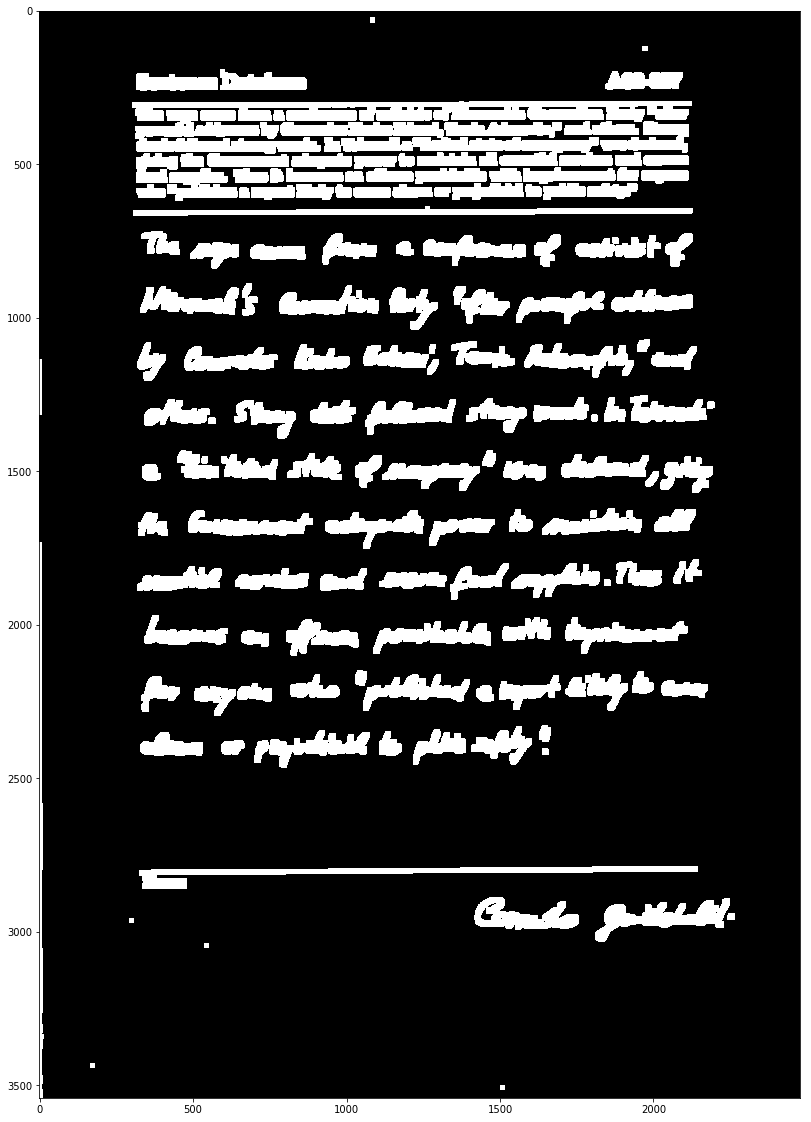

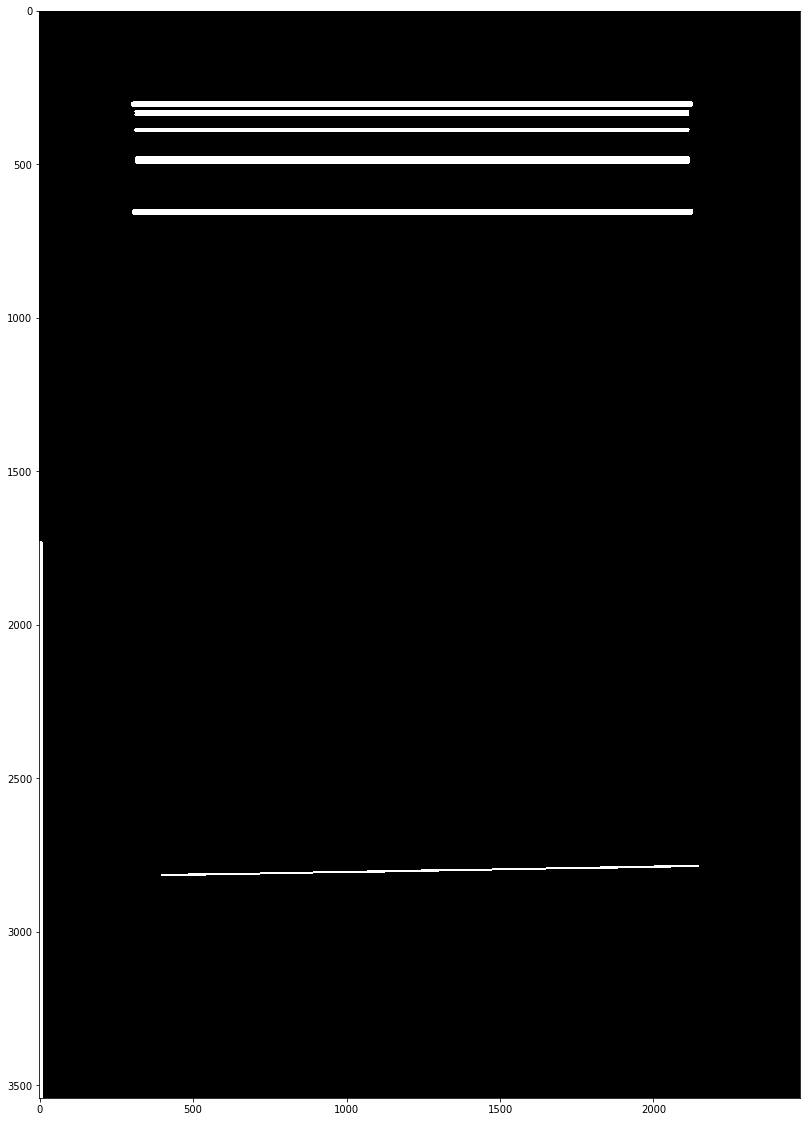

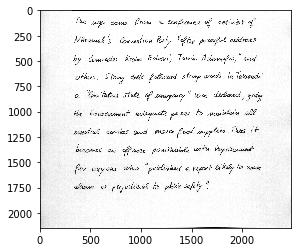

In [84]:
plt.figure(figsize=(20,20))
plt.imshow(thr, 'gray')
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(line_image, 'gray')
plt.show()
plt.imshow(extracted_img, 'gray')
plt.show()

In [75]:
extracted_img.shape[0] < 1800

True

In [45]:
with open("forms.txt") as h:
    lines = h.readlines()[16:]
freq = np.zeros(680, dtype=int)
formWriter = {}
for i in lines:
    line = i.split(' ')
    key = line[1]
    if key in formWriter.keys():
        formWriter[key].append(line[0])
    else:
        formWriter[key] = [line[0]]

In [82]:
img = cv2.imread('forms/'+formWriter['026'][1]+'.png', 0)
formWriter['026'][0]

'a02-037'

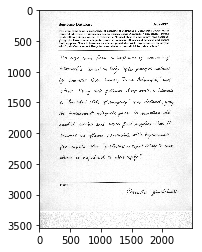

In [56]:
plt.imshow(img,'gray')
plt.show()